In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv
/kaggle/input/sales-and-satisfaction/Sales_with_NaNs_v1.3.csv


Mohammad Mehedi Hasan Munna

Undergraduate Student
Department of Computer Science and Engineering 
East West university

# Importing Important Libaries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, chi2_contingency

# Reading the dataset

In [3]:
df = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_with_NaNs_v1.3.csv')

# Checking Dataset Balance

Distribution of 'Group':
Group
Control      4300
Treatment    4299
Name: count, dtype: int64

Proportions:
Group
Control      0.500058
Treatment    0.499942
Name: count, dtype: float64


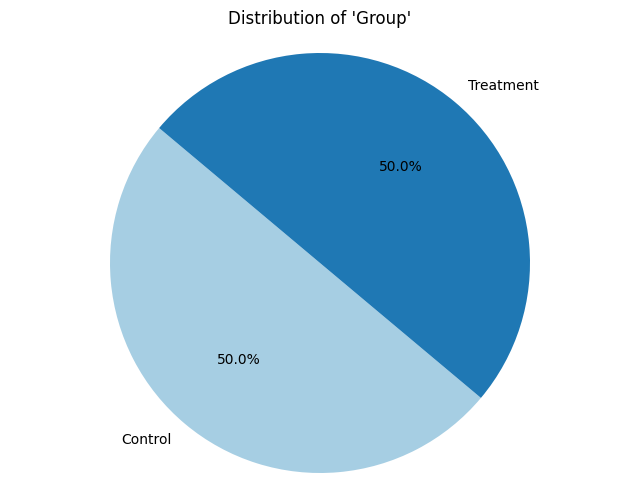

Distribution of 'Customer_Segment':
Customer_Segment
Low Value       2699
Medium Value    2697
High Value      2638
Name: count, dtype: int64

Proportions:
Customer_Segment
Low Value       0.335947
Medium Value    0.335698
High Value      0.328354
Name: count, dtype: float64


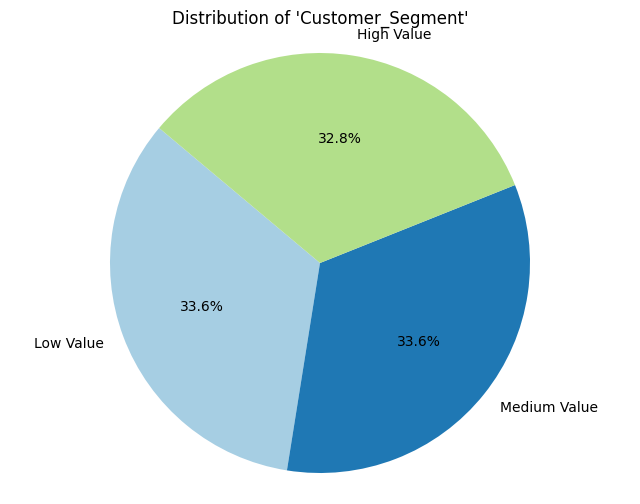

Distribution of 'Purchase_Made':
Purchase_Made
Yes    4667
No     4528
Name: count, dtype: int64

Proportions:
Purchase_Made
Yes    0.507558
No     0.492442
Name: count, dtype: float64


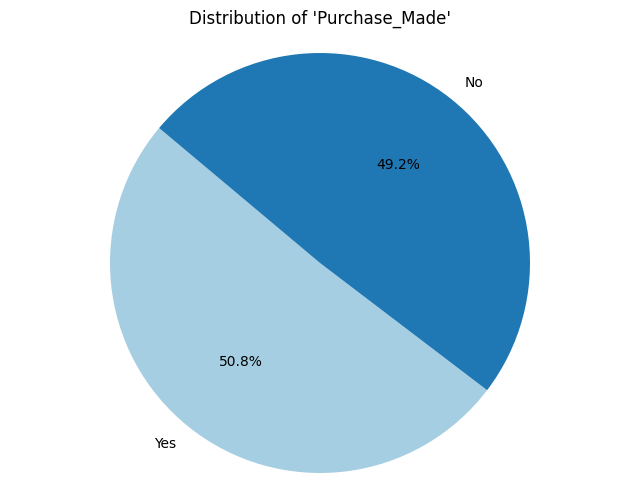

In [4]:
def check_balance_pie(column_name):
    print(f"Distribution of '{column_name}':")
    counts = df[column_name].value_counts()
    print(counts)
    print("\nProportions:")
    proportions = counts / counts.sum()
    print(proportions)
    
    # pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of '{column_name}'")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

check_balance_pie('Group')
check_balance_pie('Customer_Segment')
check_balance_pie('Purchase_Made')


# Checking columns based on data type

In [5]:
def classify_columns(dataframe):
    column_info = {}
    for column in dataframe.columns:
        # Check data type
        dtype = dataframe[column].dtype
        # Classify column
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            column_type = 'Numerical'
        elif pd.api.types.is_categorical_dtype(dataframe[column]) or dataframe[column].nunique() < 20:
            column_type = 'Categorical'
        else:
            column_type = 'Other'
        column_info[column] = column_type
    
    
    print("Column Classification:")
    for col, col_type in column_info.items():
        print(f"{col}: {col_type}")

classify_columns(df)


Column Classification:
Group: Categorical
Customer_Segment: Categorical
Sales_Before: Numerical
Sales_After: Numerical
Customer_Satisfaction_Before: Numerical
Customer_Satisfaction_After: Numerical
Purchase_Made: Categorical


<ipython-input-5-1b921198949e>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataframe[column]) or dataframe[column].nunique() < 20:


# Calculating frequency and percentage for categorical and discrete columns


Analysis for Column: Group
           Frequency  Percentage (%)
Group                               
Control         4300       50.005815
Treatment       4299       49.994185
----------------------------------------


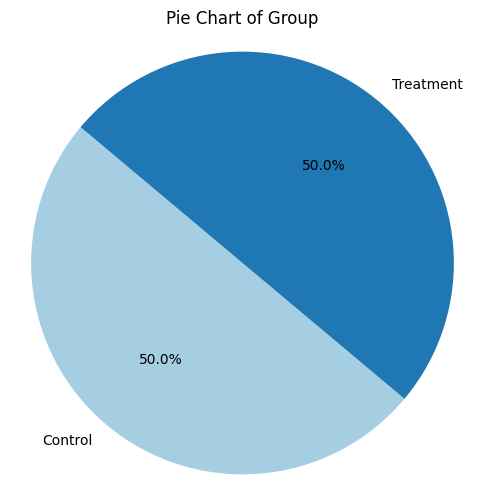


Analysis for Column: Customer_Segment
                  Frequency  Percentage (%)
Customer_Segment                           
Low Value              2699       33.594722
Medium Value           2697       33.569828
High Value             2638       32.835449
----------------------------------------


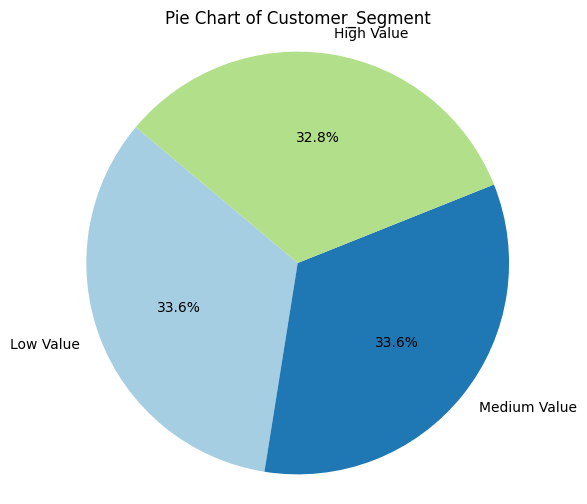


Analysis for Column: Purchase_Made
               Frequency  Percentage (%)
Purchase_Made                           
Yes                 4667       50.755846
No                  4528       49.244154
----------------------------------------


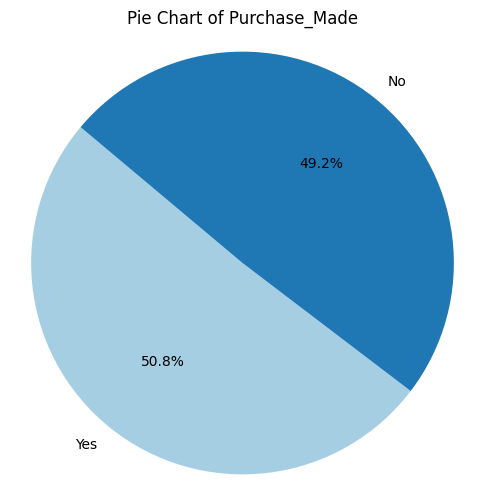

In [6]:
def analyze_categorical_columns_with_plots(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique() < 20:
            print(f"\nAnalysis for Column: {column}")
            
          
            frequency = dataframe[column].value_counts()
            percentage = dataframe[column].value_counts(normalize=True) * 100
            result = pd.DataFrame({
                'Frequency': frequency,
                'Percentage (%)': percentage
            })
            print(result)
            print("-" * 40)
            
            # Pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
            plt.title(f"Pie Chart of {column}")
            plt.axis('equal')  
            plt.show()


analyze_categorical_columns_with_plots(df)

# Calculating and plot statistics for numerical columns

Analysis of Numerical Columns:

Statistics for Column: Sales_Before
Mean: 203.72
Median: 203.32
Variance: 3055.11
Standard Deviation: 55.27
----------------------------------------

Statistics for Column: Sales_After
Mean: 280.46
Median: 273.13
Variance: 7337.56
Standard Deviation: 85.66
----------------------------------------

Statistics for Column: Customer_Satisfaction_Before
Mean: 70.25
Median: 69.49
Variance: 287.54
Standard Deviation: 16.96
----------------------------------------

Statistics for Column: Customer_Satisfaction_After
Mean: 73.87
Median: 73.84
Variance: 328.64
Standard Deviation: 18.13
----------------------------------------


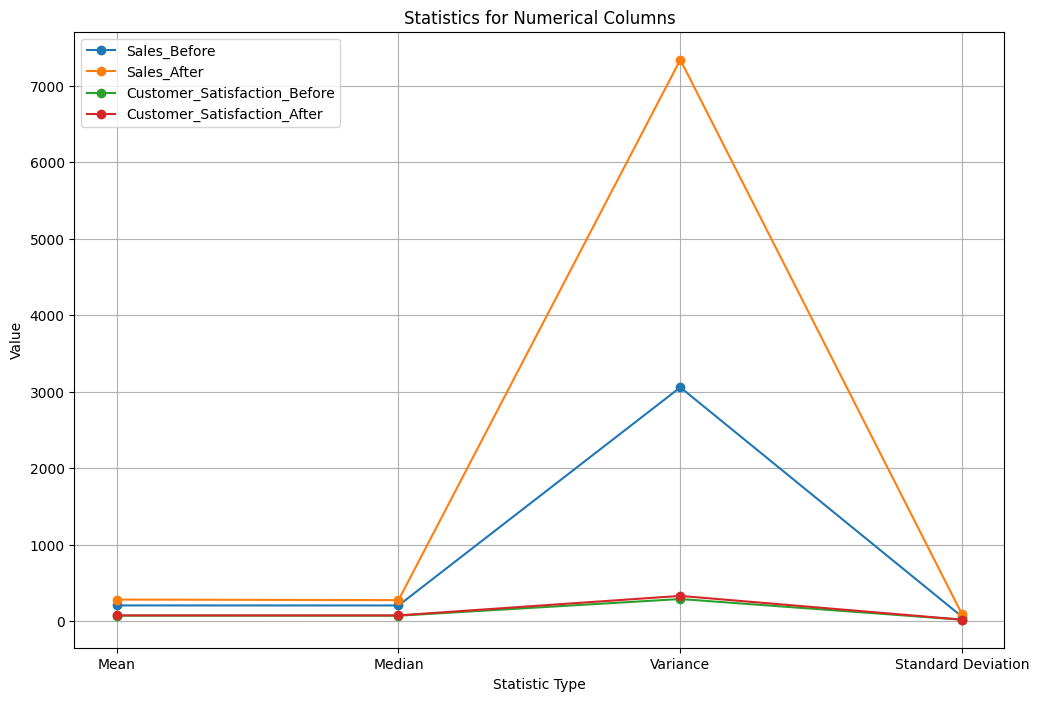

In [7]:
# Function to calculate and plot statistics for numerical columns
def analyze_and_plot_numerical_columns(dataframe):
    print("Analysis of Numerical Columns:")
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 8))

    for column in dataframe.columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Calculate statistics
            mean_val = dataframe[column].mean()
            median_val = dataframe[column].median()
            variance_val = dataframe[column].var()
            std_dev_val = dataframe[column].std()
            
            # Print statistics
            print(f"\nStatistics for Column: {column}")
            print(f"Mean: {mean_val:.2f}")
            print(f"Median: {median_val:.2f}")
            print(f"Variance: {variance_val:.2f}")
            print(f"Standard Deviation: {std_dev_val:.2f}")
            print("-" * 40)
            
            # Plot the statistics for the column
            plt.plot([1, 2, 3, 4], [mean_val, median_val, variance_val, std_dev_val], marker='o', label=column)
    
    # Set up plot
    plt.title("Statistics for Numerical Columns")
    plt.xlabel("Statistic Type")
    plt.ylabel("Value")
    plt.xticks([1, 2, 3, 4], ['Mean', 'Median', 'Variance', 'Standard Deviation'])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Call the function
analyze_and_plot_numerical_columns(df)

Group                             int64
Customer_Segment                  int64
Sales_Before                    float64
Sales_After                     float64
Customer_Satisfaction_Before    float64
Customer_Satisfaction_After     float64
Purchase_Made                     int64
dtype: object


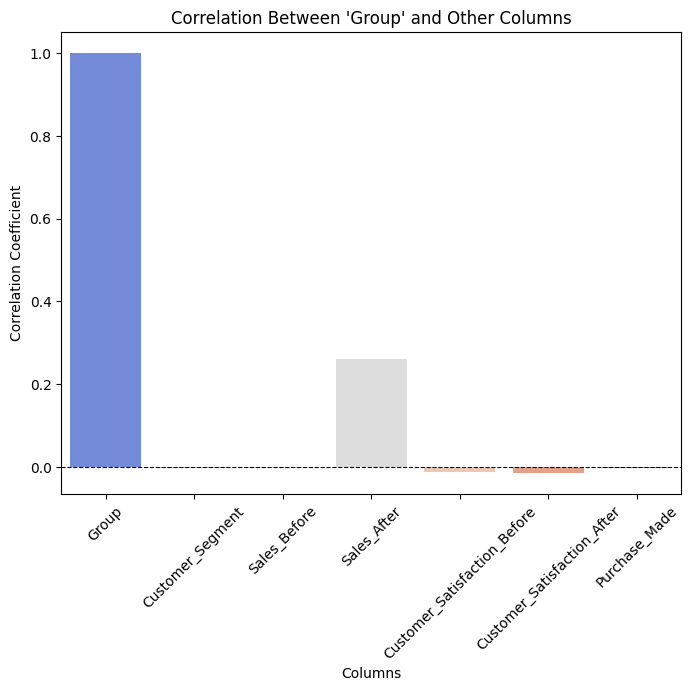

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_dataset.csv' with your dataset file path
df = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_with_NaNs_v1.3.csv')

# Function to encode all non-numeric columns
def encode_non_numeric_columns(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':  # Check if the column is categorical
            dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

# Encode all non-numeric columns
df_encoded = encode_non_numeric_columns(df)

# Check if all columns are numeric now
print(df_encoded.dtypes)

# Calculate the correlation matrix
correlation = df_encoded.corr()

# Extract the correlation of 'Group' with all other columns (or any specific column)
if 'Group' in correlation.columns:
    group_correlation = correlation['Group']

    # Plot the correlation with 'Group'
    plt.figure(figsize=(8, 6))
    sns.barplot(x=group_correlation.index, y=group_correlation.values, palette='coolwarm')
    plt.title("Correlation Between 'Group' and Other Columns")
    plt.xlabel("Columns")
    plt.ylabel("Correlation Coefficient")
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a baseline at zero
    plt.show()
else:
    print("'Group' column not found in the correlation matrix.")


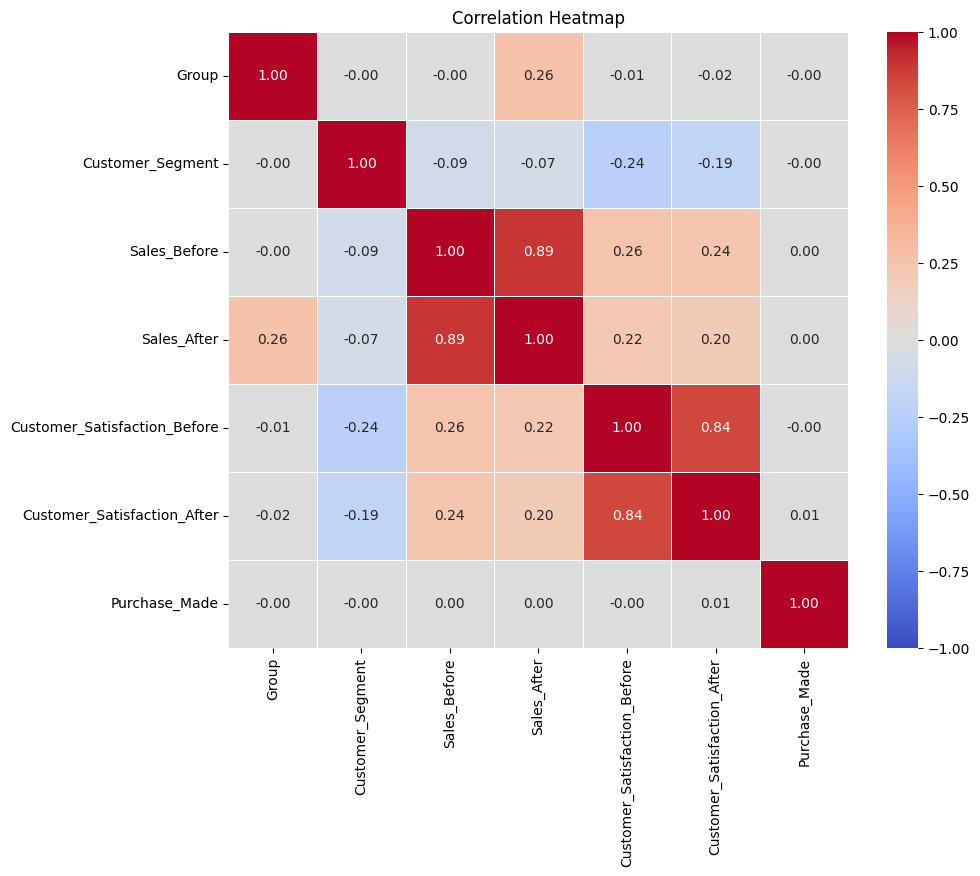

In [9]:
def plot_correlation_heatmap(dataframe):
    # Select only numerical columns
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    # Calculate the correlation matrix for numerical columns
    corr_matrix = dataframe[numerical_columns].corr()

    # Plot the heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

    # Set the title of the plot
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

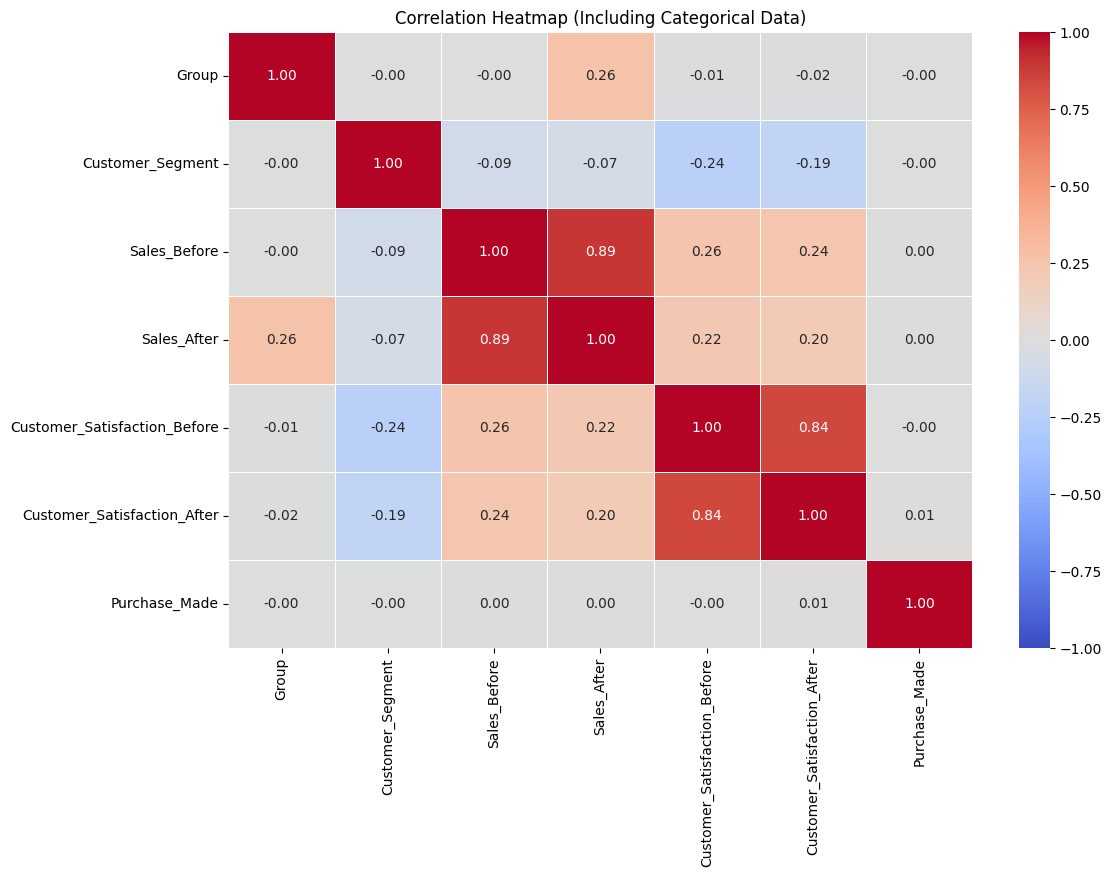

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataframe):
    le = LabelEncoder()  # Initialize the label encoder
    categorical_columns = dataframe.select_dtypes(include=['object']).columns  # Identify categorical columns
    
    for column in categorical_columns:
        dataframe[column] = le.fit_transform(dataframe[column])  # Apply label encoding
    
    return dataframe


df_encoded = encode_categorical_columns(df)


def plot_correlation_heatmap(dataframe):
    corr_matrix = dataframe.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

    plt.title("Correlation Heatmap (Including Categorical Data)")
    plt.show()


plot_correlation_heatmap(df_encoded)

# Ways to convert categorical data to numerical values to get features for machine learning projects

#  Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

categories = ['Low', 'Medium', 'High']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(categories)
print(encoded_labels)


[1 2 0]


# One-Hot Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categories = np.array(['Cat', 'Dog', 'Bird']).reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(categories)
print(one_hot_encoded)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


#  Binary Encoding

In [13]:
from category_encoders import BinaryEncoder
import pandas as pd

df = pd.DataFrame({'Animal': ['Cat', 'Dog', 'Bird']})
encoder = BinaryEncoder(cols=['Animal'])
binary_encoded = encoder.fit_transform(df)
print(binary_encoded)

   Animal_0  Animal_1
0         0         1
1         1         0
2         1         1


# Ordinal Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Low'], ['Medium'], ['High']]
encoder = OrdinalEncoder()
ordinal_encoded = encoder.fit_transform(categories)
print(ordinal_encoded)

[[1.]
 [2.]
 [0.]]


# Frequency Encoding

In [15]:
import pandas as pd

data = ['A', 'B', 'A', 'C', 'B', 'A']
df = pd.DataFrame({'Category': data})
frequency_encoded = df['Category'].map(df['Category'].value_counts())
print(frequency_encoded)

0    3
1    2
2    3
3    1
4    2
5    3
Name: Category, dtype: int64


# Target Encoding

In [16]:
import pandas as pd

df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A'],
    'Target': [1, 0, 1, 0, 1, 1]
})
target_mean = df.groupby('Category')['Target'].mean()
df['Target_Encoded'] = df['Category'].map(target_mean)
print(df)

  Category  Target  Target_Encoded
0        A       1             1.0
1        B       0             0.5
2        A       1             1.0
3        C       0             0.0
4        B       1             0.5
5        A       1             1.0
